   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

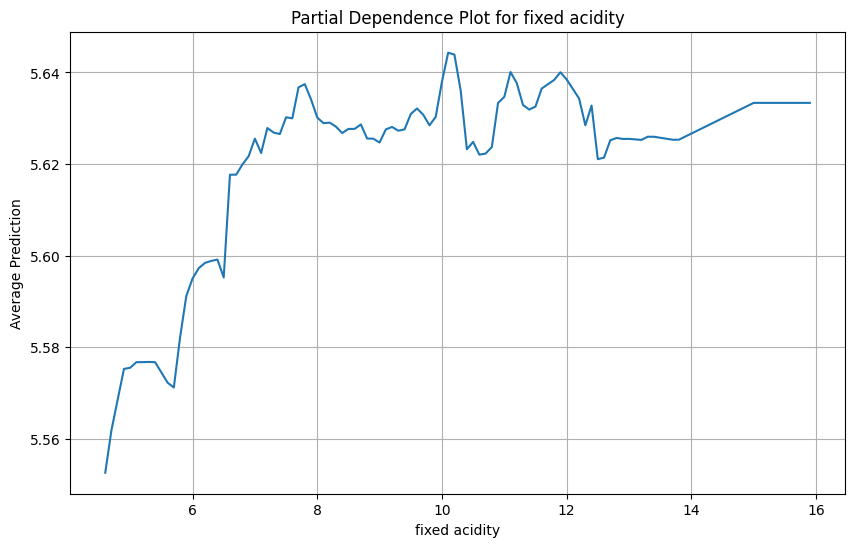

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the Red Wine Quality dataset
data = pd.read_csv("winequality-red.csv", delimiter=';')  # Change delimiter if necessary
print(data.head())

# Separate features and target
X = data.drop('quality', axis=1)  # Use 'quality' as the target variable
y = data['quality']

# Encode the target variable if necessary (not typically needed for regression)
# Here, we treat quality as a continuous variable, so encoding is not required.

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Create PDP for 'fixed acidity' (or any feature of interest)
feature_name = 'fixed acidity'
feature_values = sorted(X_train[feature_name].unique())  # Use unique values of 'fixed acidity'
print("Unique values of 'fixed acidity':", feature_values)

# Make a copy of the dataset to modify only the 'fixed acidity' column
X_temp = X_train.copy()
pdp_values = []

# Iterate over unique values of 'fixed acidity'
for value in feature_values:
    X_temp[feature_name] = value  # Set 'fixed acidity' to the current value for all samples
    prediction = model.predict(X_temp)  # Predict using the modified dataset
    pdp_values.append(np.mean(prediction))  # Store the average prediction

# Plotting the Partial Dependence Plot
plt.figure(figsize=(10, 6))
plt.plot(feature_values, pdp_values)
plt.title(f'Partial Dependence Plot for {feature_name}')
plt.xlabel(feature_name)
plt.ylabel('Average Prediction')
plt.grid()
plt.show()
